In [ ]:
import sklearn
import scipy
import scipy.stats as stats
from scipy.stats import skew,boxcox_normmax, zscore
from scipy.special import boxcox1p
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,RobustScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error 
from sklearn.model_selection import KFold, RandomizedSearchCV
from mlxtend.regressor import StackingCVRegressor
from multiprocessing import cpu_count
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
train_data = pd.read_csv("./train.csv")
test_data =  pd.read_csv("./test.csv")

In [ ]:
train_data["placed"] = train_data["placed"].replace(["Yes","No"],[1,0])
test_data["placed"] = test_data["placed"].replace(["Yes","No"],[1,0])

In [ ]:
test = test_data.drop("ID",axis = 1)
test = test_data.drop("placed",axis = 1)
train = train_data.drop("placed",axis=1)

In [ ]:
test['index']  = [(96459 + i) for i in range(1,24116)]

In [ ]:
test.set_index("index",inplace = True)

In [ ]:
train.tail()

,Gender,TypeofDisability,castecategory,Religion,JobRole,SectorName,PartnerName,TC State,TC District,TC Name,...,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher,Not In Labour Force,Employed,Unemployed
96455,Male,None,OBC,NaN,Unarmed Security Guard,Management,IL & FS Skills Development Corporation Limited,Rajasthan,Sikar,PMKK Sikar,...,967497,284579,339900,300801,225562,163591,133180,22.957682,9.344477,1.490294
96456,Female,None,Gen,Hinduism,Customer Care Executive - (Telecom Call Centre),Telecom,NIFA Infocomp Services Pvt Limited,Rajasthan,Dungarpur,Pmkk Dungarpur,...,764563,228220,162289,102704,51198,35589,28732,7.619614,6.458843,0.036286
96457,Female,None,SC,NaN,Assistant Beauty Therapist,Beauty and Wellness,Orion Edutech Private Limited,Haryana,Bhiwani,Orion Edutech Bhiwani,...,459364,154825,185281,164552,178782,120600,66816,8.574915,4.233265,0.356047
96458,Male,None,OBC,Hinduism,Mobile Phone Hardware Repair Technician,Electronics and Hardware,THE MANAV KALYAN AVAM VIKAS SANSTHA,Jharkhand,Palamu,LAL BAHADUR SHASTRI TRAINING CENTER-DALTONGANJ,...,803424,280649,273978,211695,144252,87987,48457,9.894798,3.416538,0.396084
96459,Male,None,OBC,NaN,Documentation Assistant,Logistics,Jmb Skill Center,Rajasthan,Sirohi,sirohi center,...,577092,99442,120405,83668,39072,18603,12833,7.028844,5.025699,0.107295


In [ ]:
test = test.drop("ID",axis = 1)

In [ ]:
test.head()

,Gender,TypeofDisability,castecategory,Religion,JobRole,SectorName,PartnerName,TC State,TC District,TC Name,...,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher,Not In Labour Force,Employed,Unemployed
index,,,,,,,,,,,,,,,,,,,,,
96460,Male,None,Gen,Others,Domestic Data entry Operator,IT-ITeS,ICA EDU SKILLS PVT LTD,West Bengal,Nadia,ICA - Krishnanagar,...,1570127,531520,922154,854159,314707,168159,127514,26.328569,20.842759,0.814512
96461,Male,None,OBC,Hinduism,Field Technician - Other Home Appliances,Electronics and Hardware,NEW ARAWALI SHIKSHA SAMITI,Rajasthan,Alwar,GOURAV SHIKSHA SAMITI,...,1384905,436897,425308,398494,258384,180145,141335,24.536163,9.894030,0.928954
96462,Female,None,Gen,Hinduism,Trainee Associate,Retail,Centum WorkSkills India Limited,Madhya Pradesh,Indore,PMKK_Indore,...,718174,147863,142092,107748,89939,60960,40130,14.785168,8.834991,0.522607
96463,Female,None,Gen,Hinduism,Field Technician - Computing and Peripherals,Electronics and Hardware,NAIFA COMPUTER EDUCATIONAL SANSTHAN,Madhya Pradesh,Indore,NAIFA COMPUTER EDUCATIONAL SANSTHAN,...,718174,147863,142092,107748,89939,60960,40130,14.785168,8.834991,0.522607
96464,Male,None,Gen,Hinduism,Trainee Associate,Retail,ASCENT ACADEMY OF TRAINING & DEVELOPMENT PRIVA...,Uttar Pradesh,Unnao,Ascent - Centurion,...,1130103,432828,448607,362497,198969,110867,78195,27.743099,14.655823,0.476186


In [ ]:
data = pd.concat([train,test])

In [ ]:
data.tail()

,Gender,TypeofDisability,castecategory,Religion,JobRole,SectorName,PartnerName,TC State,TC District,TC Name,...,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher,Not In Labour Force,Employed,Unemployed
120570,Female,None,Gen,NaN,Self Employed Tailor,Apparel,Aaruthal Foundation,Tamil Nadu,Karur,PMKK KARUR,...,276930,48715,125738,104427,85576,44102,40232,3.547615,2.584813,0.187259
120571,Male,None,Gen,Islam,Goods & Services Tax (GST) Accounts Assistant,BFSI,DORIC MULTIMEDIA PVT. LTD.,Punjab,Rupnagar,G.I.V.E.S,...,124100,42212,89556,79536,91465,49661,19273,3.001527,1.711048,0.565489
120572,Male,None,Gen,Hinduism,F & B Service: Steward,Tourism & Hospitality,Amro Tourism Academy,Maharashtra,Nashik,AMRO TOURISM ACADEMY,...,1481778,396350,697132,492501,475624,261919,124511,29.769311,18.647359,0.439637
120573,Female,None,SC,Hinduism,Field Technician - Computing and Peripherals,Electronics and Hardware,THE MANAV KALYAN AVAM VIKAS SANSTHA,Chhattisgarh,Rajnandgaon,LAL BAHADUR SHASTRI TRAINING CENTRE-RAJNANDGAON,...,467554,231029,246655,226671,78558,53939,21192,5.919075,7.137314,0.053700
120574,Male,None,Gen,Others,Distributor Salesman,Retail,Empower Pragati Vocational & Staffing Pvt Ltd,Punjab,Sangrur,PMKK Sangrur,...,570103,115191,179913,139981,149931,85382,29832,5.294295,2.864044,0.192698


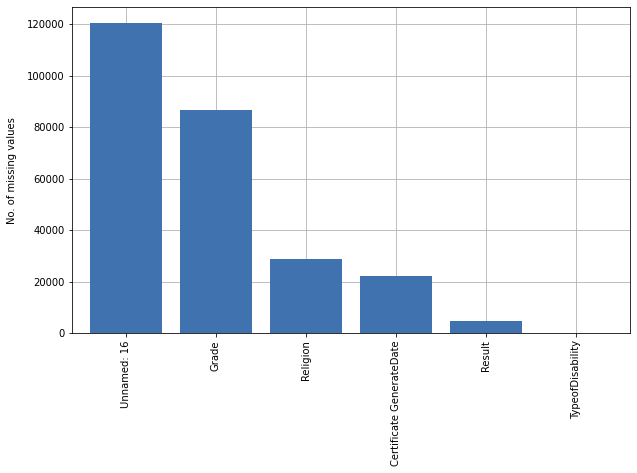

In [ ]:
nans = data.isna().sum().sort_values(ascending=False)
nans = nans[nans > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [ ]:
data = data.drop("Unnamed: 16",axis = 1)

In [ ]:
data = data.drop("Grade",axis = 1)

In [ ]:
data.tail()

,Gender,TypeofDisability,castecategory,Religion,JobRole,SectorName,PartnerName,TC State,TC District,TC Name,...,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher,Not In Labour Force,Employed,Unemployed
120570,Female,None,Gen,NaN,Self Employed Tailor,Apparel,Aaruthal Foundation,Tamil Nadu,Karur,PMKK KARUR,...,276930,48715,125738,104427,85576,44102,40232,3.547615,2.584813,0.187259
120571,Male,None,Gen,Islam,Goods & Services Tax (GST) Accounts Assistant,BFSI,DORIC MULTIMEDIA PVT. LTD.,Punjab,Rupnagar,G.I.V.E.S,...,124100,42212,89556,79536,91465,49661,19273,3.001527,1.711048,0.565489
120572,Male,None,Gen,Hinduism,F & B Service: Steward,Tourism & Hospitality,Amro Tourism Academy,Maharashtra,Nashik,AMRO TOURISM ACADEMY,...,1481778,396350,697132,492501,475624,261919,124511,29.769311,18.647359,0.439637
120573,Female,None,SC,Hinduism,Field Technician - Computing and Peripherals,Electronics and Hardware,THE MANAV KALYAN AVAM VIKAS SANSTHA,Chhattisgarh,Rajnandgaon,LAL BAHADUR SHASTRI TRAINING CENTRE-RAJNANDGAON,...,467554,231029,246655,226671,78558,53939,21192,5.919075,7.137314,0.053700
120574,Male,None,Gen,Others,Distributor Salesman,Retail,Empower Pragati Vocational & Staffing Pvt Ltd,Punjab,Sangrur,PMKK Sangrur,...,570103,115191,179913,139981,149931,85382,29832,5.294295,2.864044,0.192698


In [ ]:
cols = ["Gender",
"TypeofDisability",
"JobRole",
"SectorName",
"PartnerName",
"Result",
"Certified",
"agegroup",
"EducationLevel",
"District",
"Total Poulation",
"No. of colleges",
"Trade Count",
"No of ITI",
"Ph.D",
"Total Number of Schools",
"Overall Literacy",
"Female Literacy",
"Business Services",
"Total Rural Household",
"Total Urban Household",
"Total Households",
"No of Population Having Highest Education Level of Illitrate",
"No of Population Having Highest Education Level of Llitrate But Below Primary",
"No of Population Having Highest Education Level of Primary",
"No of Population Having Highest Education Level of Middle",
"No of Population Having Highest Education Level of Secondary",
"No of Population Having Highest Education Level of Higher Secondary",
"No of Population Having Highest Education Level of Graduate Or Higher"]

In [ ]:
data = data[cols]

In [ ]:
data.head()

,Gender,TypeofDisability,JobRole,SectorName,PartnerName,Result,Certified,agegroup,EducationLevel,District,...,Total Rural Household,Total Urban Household,Total Households,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher
0,Female,None,DTH Set Top Box Installation & Service Technician,Electronics and Hardware,ICA EDU SKILLS PVT LTD,Pass,Yes,22-25,10th std & below,Hassan,...,348175,77638,425813,401227,155769,296418,190847,232678,113038,62410
1,Female,None,Retail Sales Associate,Retail,Sun City Of Skill India,Pass,Yes,22-25,10th std & below,Ambala,...,114196,87666,201862,160243,57256,113603,105254,93223,52879,24092
2,Female,None,Retail Sales Associate,Retail,SHRI TECHNOLOGIES,Pass,Yes,22-25,11th-12th std,Vizianagaram,...,478978,89774,568752,1031683,217587,249367,207675,139811,85959,63084
3,Female,None,Sewing Machine Operator,Apparel,SHRI TECHNOLOGIES,Pass,Yes,22-25,11th-12th std,Shivamogga,...,257688,139979,397667,355222,142850,265371,188432,154600,71815,45850
4,Male,None,Field Technician - Computing and Peripherals,Electronics and Hardware,Dreamz Trust,Pass,Yes,26-30,11th-12th std,Alwar,...,529224,103227,632451,1384905,436897,425308,398494,258384,180145,141335


In [ ]:
data["Result"] = data.groupby("EducationLevel")["Result"].transform(lambda x:x.fillna(x.mode()[0]))

In [ ]:
data["TypeofDisability"] = data["TypeofDisability"].fillna("None")

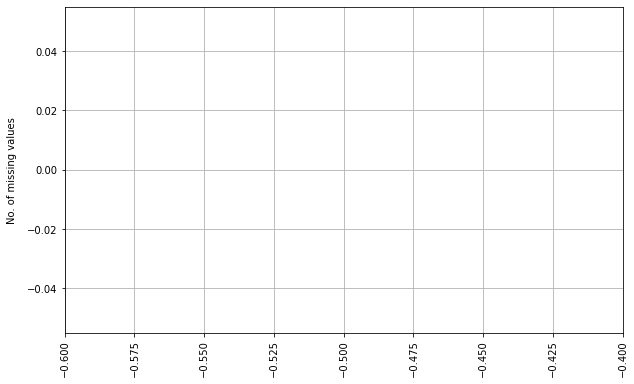

In [ ]:
nans = data.isna().sum().sort_values(ascending=False)
nans = nans[nans > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [ ]:
data.tail()

,Gender,TypeofDisability,JobRole,SectorName,PartnerName,Result,Certified,agegroup,EducationLevel,District,...,Total Rural Household,Total Urban Household,Total Households,No of Population Having Highest Education Level of Illitrate,No of Population Having Highest Education Level of Llitrate But Below Primary,No of Population Having Highest Education Level of Primary,No of Population Having Highest Education Level of Middle,No of Population Having Highest Education Level of Secondary,No of Population Having Highest Education Level of Higher Secondary,No of Population Having Highest Education Level of Graduate Or Higher
120570,Female,None,Self Employed Tailor,Apparel,Aaruthal Foundation,Not Appeared,No,36-40,11th-12th std,Karur,...,176084,99881,275965,276930,48715,125738,104427,85576,44102,40232
120571,Male,None,Goods & Services Tax (GST) Accounts Assistant,BFSI,DORIC MULTIMEDIA PVT. LTD.,Pass,Yes,26-30,Under Graduate/Graduate,Rupnagar,...,94482,29405,123887,124100,42212,89556,79536,91465,49661,19273
120572,Male,None,F & B Service: Steward,Tourism & Hospitality,Amro Tourism Academy,Pass,Yes,26-30,11th-12th std,Nashik,...,702961,431233,1134194,1481778,396350,697132,492501,475624,261919,124511
120573,Female,None,Field Technician - Computing and Peripherals,Electronics and Hardware,THE MANAV KALYAN AVAM VIKAS SANSTHA,Pass,Yes,19-21,11th-12th std,Rajnandgaon,...,265975,58557,324532,467554,231029,246655,226671,78558,53939,21192
120574,Male,None,Distributor Salesman,Retail,Empower Pragati Vocational & Staffing Pvt Ltd,Fail,No,26-30,10th std & below,Sangrur,...,214234,96103,310337,570103,115191,179913,139981,149931,85382,29832


In [ ]:
cols = data.select_dtypes(np.number).columns
data[cols] = StandardScaler().fit_transform(data[cols])

In [ ]:
data = pd.get_dummies(data)

In [ ]:
X_train = data.loc[train.index]
X_test = data.loc[test.index]

In [ ]:
y_train = train_data["placed"]
y_test = test_data["placed"]

In [ ]:
print(len(X_train),len(X_test))
print(len(y_train),len(y_test))

96460 24115
96460 24115


In [ ]:
model = LogisticRegression(random_state=0)

In [ ]:
grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
}

In [ ]:
search = RandomizedSearchCV(LogisticRegression(),param_distributions=grid,n_jobs=-1)
searchbest = search.fit(X_train,y_train)
model = searchbest.best_estimator_

In [ ]:
predictions = model.predict(X_test)

In [ ]:
score = model.score(X_test,y_test)
print("{:.3f}%".format(score*100))

71.578%


In [ ]:
predictions = ["Yes" if i==1 else "No" for i in predictions]

In [ ]:
my_prediction = pd.DataFrame({"ID": [i+1 for i in range(len(test_data.index))], "placed": predictions})

In [ ]:
my_prediction.to_csv("./my_prediction_ensemble.csv", index=False)